# Analyzing TATA Steel and JSW Steel stock performance using Python

The steel industry in India is one of the largest and most important sectors in the country’s economy.  It has witnessed significant growth and transformation over the years, making India one of the world’s top steel producers. Some of the prominent steel companies in India include Tata Steel, Steel Authority of India Limited (SAIL), JSW Steel, Jindal Steel and Power Limited (JSPL), and Essar Steel (now part of ArcelorMittal Nippon Steel India).


In this analysis, we will look at the stock performance of TATA Steel and JSW Steel. The stock data for NIFTY 50 is also taken for comparing and analysis in terms of benchmark.The stock data for both the companies and NIFTY 50 is taken from Yahoo finance from January 2018 to October 2023. The analysis will consist of the various components, which are listed below:
1. Getting the data from Yahoo Finance. Plotting and comparing the movement of closing price.
2. Plotting and comparing the 10 day moving average of the closing price for both the companies.
3. Plotting the normalized returns for both the stocks to look at the relative movement.
4. Computing the returns for the stocks using daily logarithmic return.
5. Calculating the average annual returns and volatility.
6. Find the distribution of the returns using the empirical rule (called Three Sigma Rule or the 68-95-99.7 Rule) and Q-Q plots (Quantile-Quantile plot)
7. Find and plot the correlation between the two stocks.
8. Perform regression analysis between the returns of NIFTY 50 (the benchmark) and the two stocks.



#### Importing the required dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the stock data into the dataframe

In [2]:
tata = pd.read_csv('TATASTEEL.NS.csv')
jsw = pd.read_csv('JSWSTEEL.NS.csv')
nifty50 = pd.read_csv('^NSEI.csv')

#### Converting the dates in the respective dataframes to datetime objects 

In [3]:
tata['Date'] = pd.to_datetime(tata['Date'])
tata.set_index('Date', inplace = True)

In [4]:
jsw['Date'] = pd.to_datetime(jsw['Date'])
jsw.set_index('Date', inplace = True)

In [5]:
nifty50['Date'] = pd.to_datetime(nifty50['Date'])
nifty50.set_index('Date', inplace = True)

## 1. Plotting the closing price for both the stocks

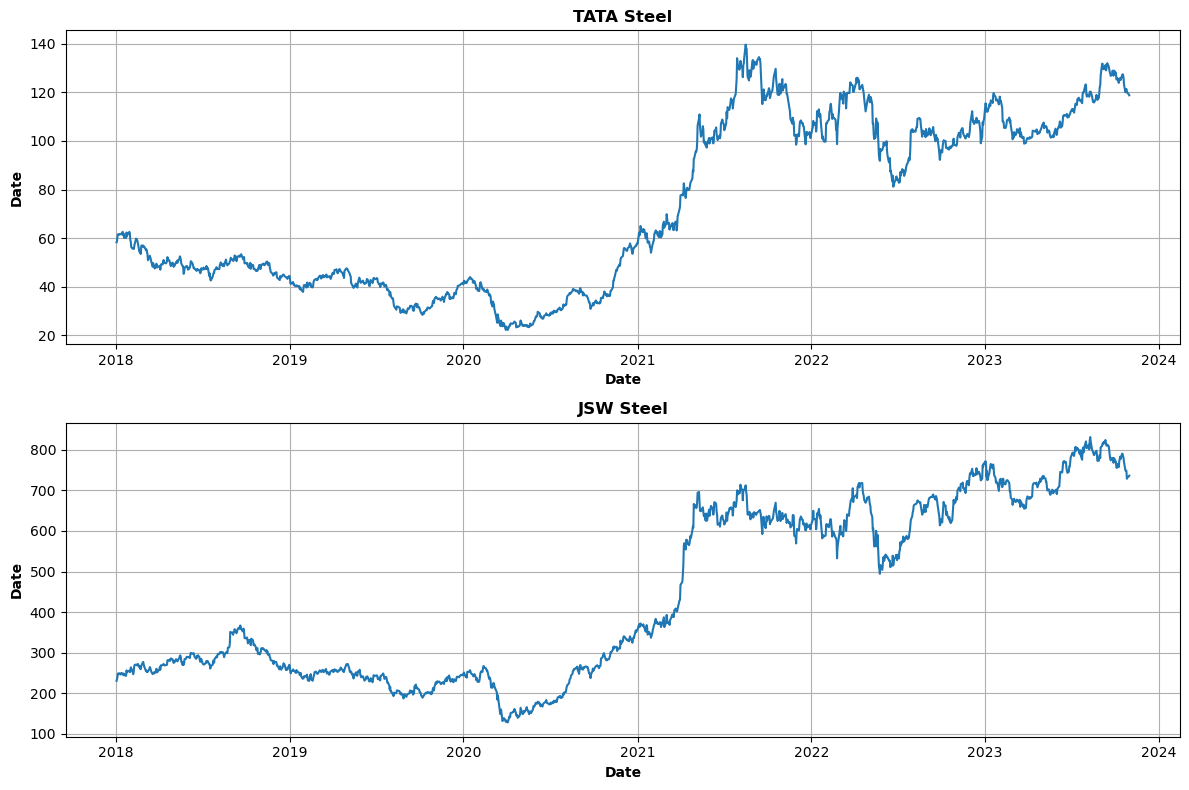

In [6]:
fig,axes = plt.subplots(nrows=2,ncols=1, figsize=(12,8))
axes[0].plot(tata['Adj Close'])
axes[0].set_title('TATA Steel', fontweight='bold')
axes[0].set_xlabel('Date', fontweight='bold')
axes[0].set_ylabel('Date', fontweight='bold')
axes[0].grid(True)
axes[1].plot(jsw['Adj Close'])
axes[1].set_title('JSW Steel', fontweight='bold')
axes[1].set_xlabel('Date', fontweight='bold')
axes[1].set_ylabel('Date', fontweight='bold')
axes[1].grid(True)
plt.tight_layout()

## 2. Plotting the 10 day moving average of the closing price

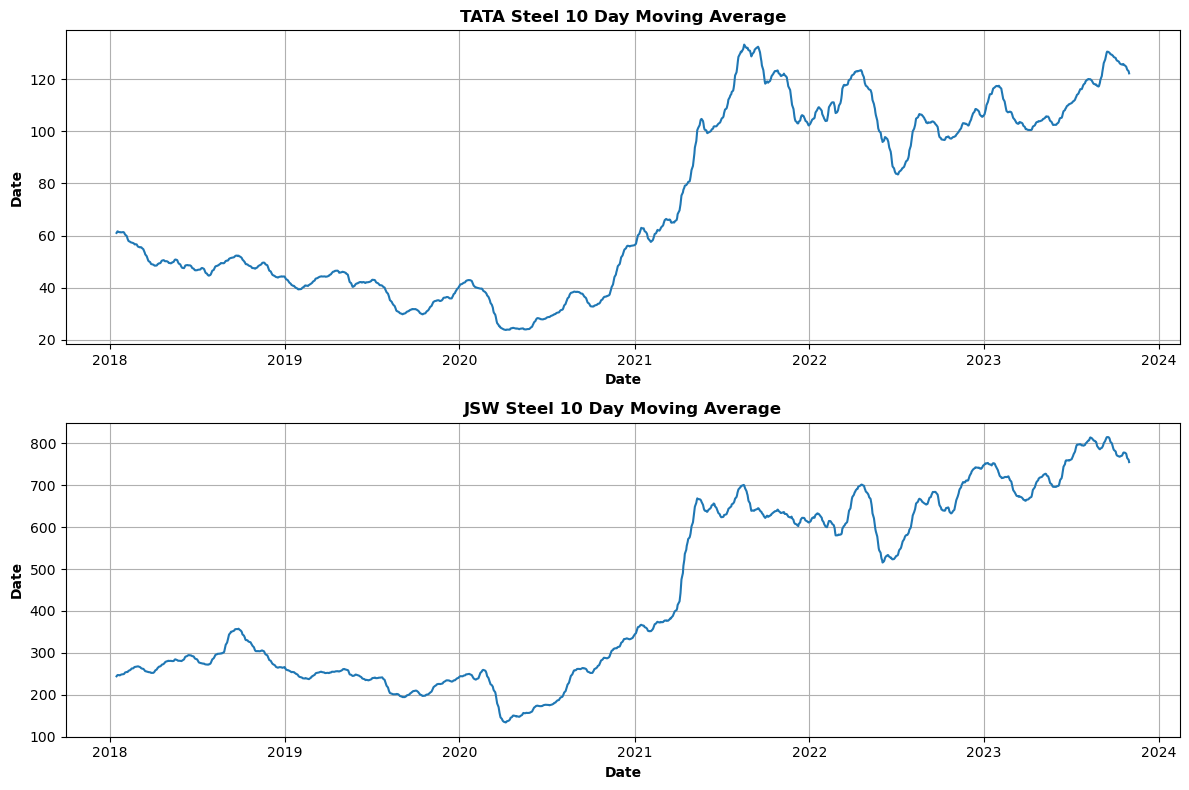

In [7]:
fig,axes = plt.subplots(nrows=2,ncols=1, figsize=(12,8))
axes[0].plot(tata['Adj Close'].rolling(window=10).mean())
axes[0].set_title('TATA Steel 10 Day Moving Average', fontweight='bold')
axes[0].set_xlabel('Date', fontweight='bold')
axes[0].set_ylabel('Date', fontweight='bold')
axes[0].grid(True)
axes[1].plot(jsw['Adj Close'].rolling(window=10).mean())
axes[1].set_title('JSW Steel 10 Day Moving Average', fontweight='bold')
axes[1].set_xlabel('Date', fontweight='bold')
axes[1].set_ylabel('Date', fontweight='bold')
axes[1].grid(True)
plt.tight_layout()

## 3. Plotting the normalized returns for both the stocks to look at the relative movement.

Normalized returns are obtained by dividing the adjusted closing price for each day for a stock by the adjusted price on the first day of the time period. Since the stocks have different price levels, so normalized returns helps in understanding the movement of the stocks relative to each other because the starting points is 1.

In [8]:
normal_return = pd.DataFrame()
normal_return['TATA Normalized'] = tata['Adj Close']/tata['Adj Close'][0]
normal_return['JSW Normalized'] = jsw['Adj Close']/jsw['Adj Close'][0]

In [9]:
normal_return.head()

,TATA Normalized,JSW Normalized
Date,,
2018-01-02,1.000000,1.000000
2018-01-03,1.007747,1.015687
2018-01-04,1.042438,1.047628
2018-01-05,1.056767,1.077679
2018-01-08,1.054093,1.081081


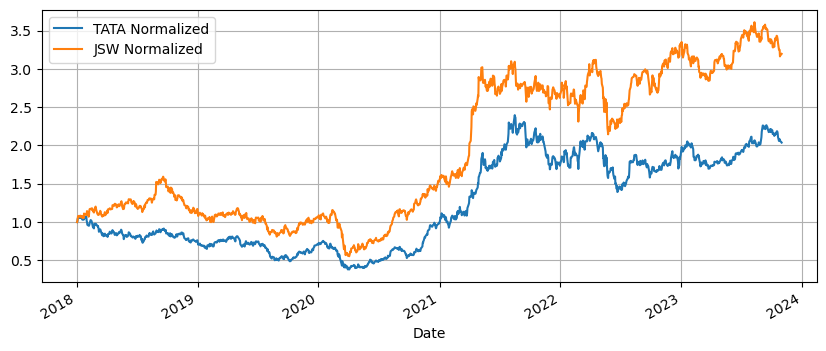

In [10]:
plt.figure(figsize=(10,4))
normal_return['TATA Normalized'].plot()
normal_return['JSW Normalized'].plot()
plt.grid(True)
plt.legend()

## 4. Computing the returns for the stocks using daily logarithmic return.

Daily returns gives us the percent gain (or loss) if we bought the stock on one day and then sold it the next day. The returns are calculated as the daily percent changes in the price. Using daily returns several important calculations can be made like average annul returns, daily volatility, average annual volatility.

In [11]:
returns = pd.DataFrame()
returns['TATA Returns'] = np.log(tata['Adj Close']/tata['Adj Close'].shift(1))
returns['JSW Returns'] = np.log(jsw['Adj Close']/jsw['Adj Close'].shift(1))
returns['NIFTY Returns'] = np.log(nifty50['Adj Close']/nifty50['Adj Close'].shift(1))
returns.head()

,TATA Returns,JSW Returns,NIFTY Returns
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.007717,0.015565,0.000096
2018-01-04,0.033845,0.030963,0.005881
2018-01-05,0.013652,0.028281,0.005132
2018-01-08,-0.002534,0.003152,0.006114


## 5. Calculating the average annual returns and volatility.

The average annual returns is calculated by taking the mean of daily returns and multiplying it by 252 (which is the approximate number of trading days in a year). The annual volatility is calculated by taking the standard deviation of daily returns and multiplying it by square root of 252.

In [12]:
# Calculating the average annual returns 
returns.mean()*252

TATA Returns     0.124652
JSW Returns      0.203466
NIFTY Returns    0.101963
dtype: float64

TATA Steel has an average annual return of around 12%, JSW Steel has an average annual return of around 20%, NIFTY 50 has an average annual return of around 10%

In [13]:
# Calculating the average annual volatility
returns.std()*(252**0.5)

TATA Returns     0.385409
JSW Returns      0.370372
NIFTY Returns    0.185330
dtype: float64

TATA Steel has an average annual volatility of around 38%, JSW Steel has an average annual volatility of around 37%, NIFTY 50 has an average annual volatility of around 18%

## 6. Finding the distribution of the returns using the empirical rule (also called the 68-95-99.7 Rule or The Three Sigma Rule) and Q-Q plots (Quantile-Quantile plot)

### 6(a). Finding the distribution of TATA Steel and JSW Steel returns using the 68-95-99.7 Rule

The rule outlines the following insights for a normal distribution:
1. Approximately 68% of the data falls within one standard deviation from the mean.
2. Around 95% of the data falls within two standard deviations from the mean.
3. Almost 99.7% of the data falls within three standard deviations from the mean.

In [14]:
# TATA and JSW returns after dropping null values
ret_tata = returns['TATA Returns'].dropna()
ret_jsw = returns['JSW Returns'].dropna()

In [15]:
# Calculating the daily standard deviation and daily retuns
mean_tata = ret_tata.mean()
deviation_tata = ret_tata.std()
mean_jsw = ret_jsw.mean()
deviation_jsw = ret_jsw.std()
print('TATA Mean Daily Return:', mean_tata)
print('TATA Mean Daily Standard Deviation:', deviation_tata)
print('JSW Mean Daily Return:', mean_jsw)
print('JSW Mean Daily Standard Deviation:', deviation_jsw)

TATA Mean Daily Return: 0.0004946492290835596
TATA Mean Daily Standard Deviation: 0.024278469366314694
JSW Mean Daily Return: 0.0008074058552851437
JSW Mean Daily Standard Deviation: 0.023331237555011486


In [16]:
# Number of points within one, two and three standard deviations for TATA Steel
one_std_tata = len(ret_tata[(ret_tata - mean_tata) < (deviation_tata)])/len(ret_tata)*100
two_std_tata = len(ret_tata[(ret_tata - mean_tata) < (2*deviation_tata)])/len(ret_tata)*100
three_std_tata = len(ret_tata[(ret_tata - mean_tata) < (3*deviation_tata)])/len(ret_tata)*100
print('TATA Steel returns within one standard deviation: ', one_std_tata)
print('TATA Steel returns within two standard deviation: ', two_std_tata)
print('TATA Steel returns three standard deviation: ', three_std_tata)
# Number of points within one, two and three standard deviations for JSW Steel
one_std_jsw = len(ret_jsw[(ret_jsw - mean_jsw) < (deviation_jsw)])/len(ret_jsw)*100
two_std_jsw = len(ret_jsw[(ret_jsw - mean_jsw) < (2*deviation_jsw)])/len(ret_jsw)*100
three_std_jsw = len(ret_jsw[(ret_tata - mean_jsw) < (3*deviation_jsw)])/len(ret_jsw)*100
print('JSW Steel returns within one standard deviation: ', one_std_jsw)
print('JSW Steel returns within two standard deviation: ', two_std_jsw)
print('JSW Steel returns within three standard deviation: ', three_std_jsw)

TATA Steel returns within one standard deviation:  87.28283530229326
TATA Steel returns within two standard deviation:  97.0813064628214
TATA Steel returns three standard deviation:  99.65253648366922
JSW Steel returns within one standard deviation:  87.6997915218902
JSW Steel returns within two standard deviation:  97.77623349548298
JSW Steel returns within three standard deviation:  99.5135510771369


### 6(b). Finding the distribution of TATA Steel and JSW Steel returns using the Q-Q plot (Quantile-Quantile plot)

The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. A quantile means the fraction (or percent) of points below the given value. That is, the 0.3 (or 30%) quantile is the point at which 30% percent of the data fall below and 70% fall above that value.
In our case, we want to look whether the returns are normally distributed or not. So, the q-q plot that we will use will compare the quantile values of our returns data with the quantile of an ideal normal distrinution. If the points fall approximately on the diagonal line, it suggests that our returns data and the theoretical distribution are similar suggesting that our returns data is normally distributed. Deviations from the diagonal indicate differences between the distributions. We will create a q-q (quantile-quantile) plot using Matplotlib and SciPy's probplot function.

In [17]:
import scipy.stats as stats

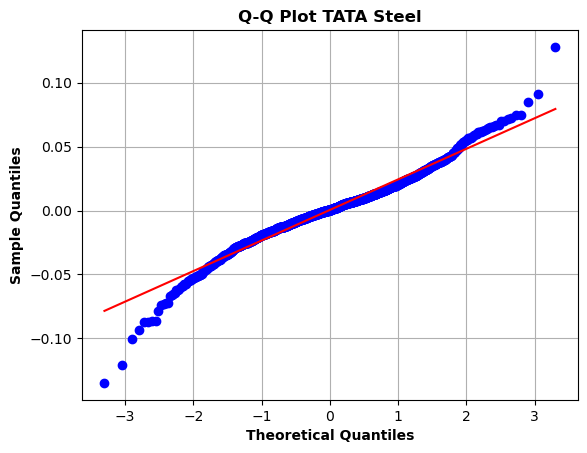

In [18]:
# Checking the returns of TATA Steel
stats.probplot(ret_tata, dist="norm", plot=plt)
plt.title('Q-Q Plot TATA Steel', fontweight = 'bold')
plt.xlabel('Theoretical Quantiles', fontweight = 'bold')
plt.ylabel('Sample Quantiles', fontweight = 'bold')
plt.grid(True)

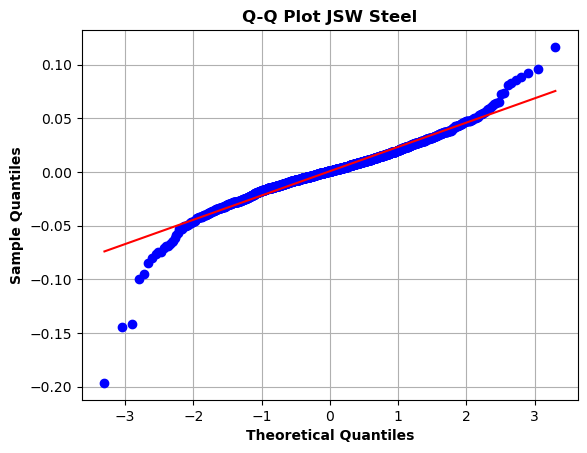

In [19]:
# Checking the returns of JSW Steel
stats.probplot(ret_jsw, dist="norm", plot=plt)
plt.title('Q-Q Plot JSW Steel', fontweight = 'bold')
plt.xlabel('Theoretical Quantiles', fontweight = 'bold')
plt.ylabel('Sample Quantiles', fontweight = 'bold')
plt.grid(True)

## 7. Finding and plotting the correlation of returns between the two stocks.

In [20]:
returns.corr()

,TATA Returns,JSW Returns,NIFTY Returns
TATA Returns,1.000000,0.752316,0.592343
JSW Returns,0.752316,1.000000,0.644330
NIFTY Returns,0.592343,0.644330,1.000000


<AxesSubplot:>

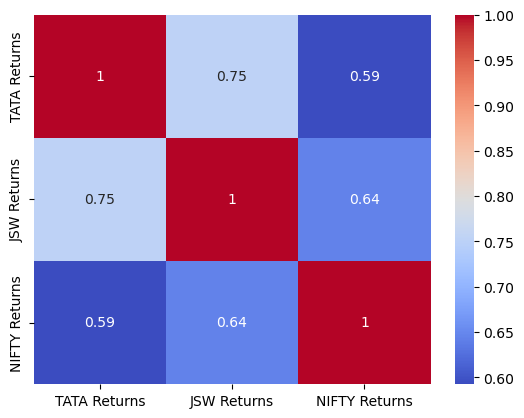

In [21]:
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')

It can be seen above that the returns of TATA and JSW have a correlation of 75%. The correlation of returns of NIFTY 50 and TATA is 59% whereas the correlation of returns of NIFTY 50 and JSW is 64%. We can look at the correlation between returns of TATA and JSW Steel using a scatter plot below.

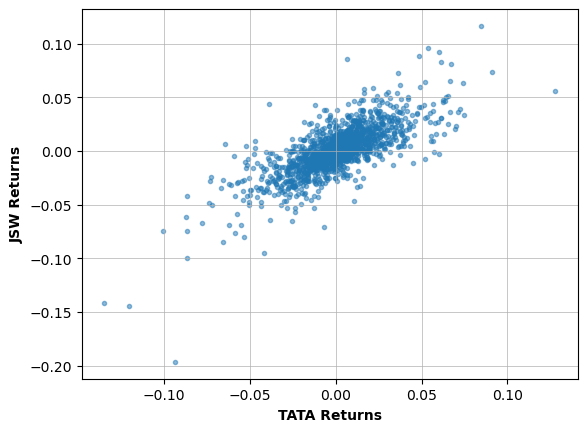

In [22]:
# Plotting the returns of the stocks against each other
plt.scatter(ret_tata,ret_jsw,marker='.',alpha=0.5)
plt.xlabel('TATA Returns', fontweight = 'bold')
plt.ylabel('JSW Returns', fontweight = 'bold')
plt.grid(ls='-',lw='0.5');

## 8. Performing regression analysis between the returns of NIFTY 50 (the benchmark) and the two stocks.

In [23]:
# Performing regression analysis between TATA Steel and NIFTY 50 returns
stats.linregress(returns.dropna()['NIFTY Returns'],returns.dropna()['TATA Returns'])

LinregressResult(slope=1.2269553023796531, intercept=-6.390590636878775e-05, rvalue=0.5923426495486092, pvalue=1.880697339050487e-136, stderr=0.04411657858027471, intercept_stderr=0.0005151757454216638)

We can see the results of the regression in the form of slope, intercept, r value, p value, standard error. The slope indicates how much the returns of TATA Steel changes for a unit change in the returns of NIFTY 50. The correlation value is given by the rvalue (which we have already seen). The slope is 1.22 which means for a unit change in the returns of NIFTY 50, the returns of TATA Steel change by 1.22 in the positive direction. The correlation between the returns of TATA Steel and NIFTY 50 is 59%.


In [24]:
# Performing regression analysis between JSW Steel and NIFTY 50 returns
stats.linregress(returns.dropna()['NIFTY Returns'],returns.dropna()['JSW Returns'])

LinregressResult(slope=1.2844489409300175, intercept=0.0002857364937955954, rvalue=0.6443296544700422, pvalue=6.74774990650857e-169, stderr=0.040300198140545175, intercept_stderr=0.0004706095822892989)

The slope is 1.28 which means for a unit change in the returns of NIFTY 50, the returns of JSW Steel changes by 1.28 in the positive direction. The correlation between the returns of JSW Steel and NIFTY 50 is 64%